In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "emilia-romagna"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,8,Emilia-Romagna,15,2,17,9,26,8,8,...,0.0,243.0,0.0,3.0,11.76,65.38,3.29,0.00,0.00,44.44
1,2020-02-26T18:00:00,8,Emilia-Romagna,20,3,23,23,46,20,21,...,1.0,186.0,0.0,14.0,13.04,50.00,11.29,0.00,50.00,76.92
2,2020-02-27T18:00:00,8,Emilia-Romagna,36,6,42,54,96,50,50,...,0.0,456.0,0.0,31.0,14.29,43.75,10.96,0.00,100.00,108.70
3,2020-02-28T18:00:00,8,Emilia-Romagna,56,6,62,81,143,47,48,...,1.0,244.0,0.0,27.0,9.68,43.36,19.67,0.00,0.00,48.96
4,2020-02-29T17:00:00,8,Emilia-Romagna,86,11,97,116,213,70,72,...,2.0,273.0,0.0,35.0,11.34,45.54,26.37,0.00,83.33,48.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,2020-12-03T17:00:00,8,Emilia-Romagna,2668,245,2913,67324,70237,-1068,1766,...,85.0,17979.0,6242.0,-1042.0,8.41,4.15,9.82,28.29,-0.81,-1.50
283,2020-12-04T17:00:00,8,Emilia-Romagna,2717,248,2965,67091,70056,-181,2143,...,63.0,17677.0,5943.0,-233.0,8.36,4.23,12.12,36.06,1.22,-0.26
284,2020-12-05T17:00:00,8,Emilia-Romagna,2707,243,2950,66679,69629,-427,1964,...,52.0,18663.0,6140.0,-412.0,8.24,4.24,10.52,31.99,-2.02,-0.61
285,2020-12-06T17:00:00,8,Emilia-Romagna,2736,241,2977,65190,68167,-1462,1788,...,88.0,11171.0,5979.0,-1489.0,8.10,4.37,16.01,29.90,-0.82,-2.10


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 7, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1891
Nuovi tamponi: 9865.0
Percentuale nuovi positivi/nuovi tamponi: 19.0 %
Nuovi guariti: 519.0
Nuovi deceduti: 57.0
Variazione positivi ricoverati con sintomi: 69.0
Variazione positivi in terapia intensiva: -2.0
Variazione positivi in isolamento dimiciliare: 1247.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 7, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-08T17:00:00,8,Emilia-Romagna,232,13,245,5179,5424,129,184,...,1.0,11695.0,5675.0,121.0,5.31,4.52,1.57,3.24,-7.14,2.44
1,2020-10-09T17:00:00,8,Emilia-Romagna,226,14,240,5369,5609,185,276,...,1.0,10747.0,5058.0,190.0,5.83,4.28,2.57,5.46,7.69,3.41
2,2020-10-10T17:00:00,8,Emilia-Romagna,241,16,257,5719,5976,367,383,...,1.0,13779.0,5486.0,350.0,6.23,4.30,2.78,6.98,14.29,6.54
3,2020-10-11T17:00:00,8,Emilia-Romagna,254,23,277,6072,6349,373,384,...,1.0,8660.0,4636.0,353.0,8.30,4.36,4.43,8.28,43.75,6.24
4,2020-10-12T17:00:00,8,Emilia-Romagna,284,25,309,6364,6673,324,337,...,1.0,6660.0,4051.0,292.0,8.09,4.63,5.06,8.32,8.70,5.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-03T17:00:00,8,Emilia-Romagna,2668,245,2913,67324,70237,-1068,1766,...,85.0,17979.0,6242.0,-1042.0,8.41,4.15,9.82,28.29,-0.81,-1.50
57,2020-12-04T17:00:00,8,Emilia-Romagna,2717,248,2965,67091,70056,-181,2143,...,63.0,17677.0,5943.0,-233.0,8.36,4.23,12.12,36.06,1.22,-0.26
58,2020-12-05T17:00:00,8,Emilia-Romagna,2707,243,2950,66679,69629,-427,1964,...,52.0,18663.0,6140.0,-412.0,8.24,4.24,10.52,31.99,-2.02,-0.61
59,2020-12-06T17:00:00,8,Emilia-Romagna,2736,241,2977,65190,68167,-1462,1788,...,88.0,11171.0,5979.0,-1489.0,8.10,4.37,16.01,29.90,-0.82,-2.10


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

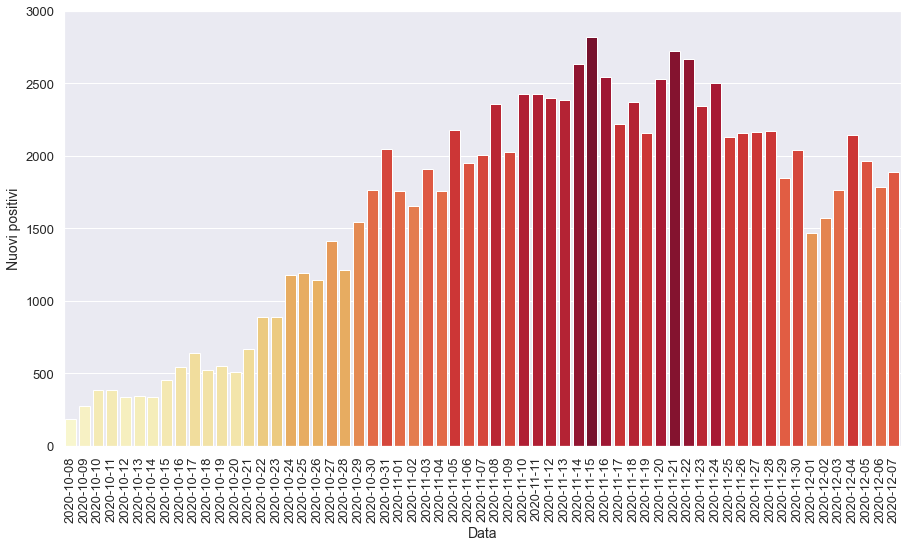

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

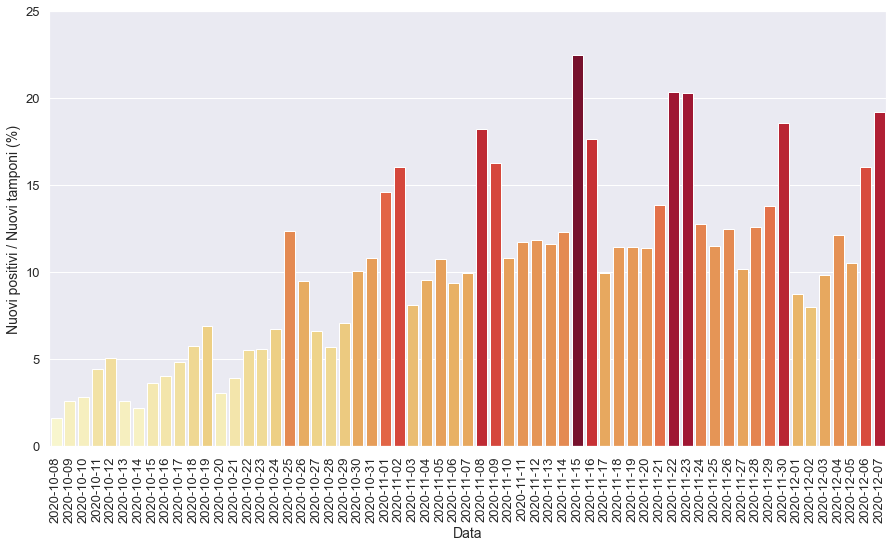

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

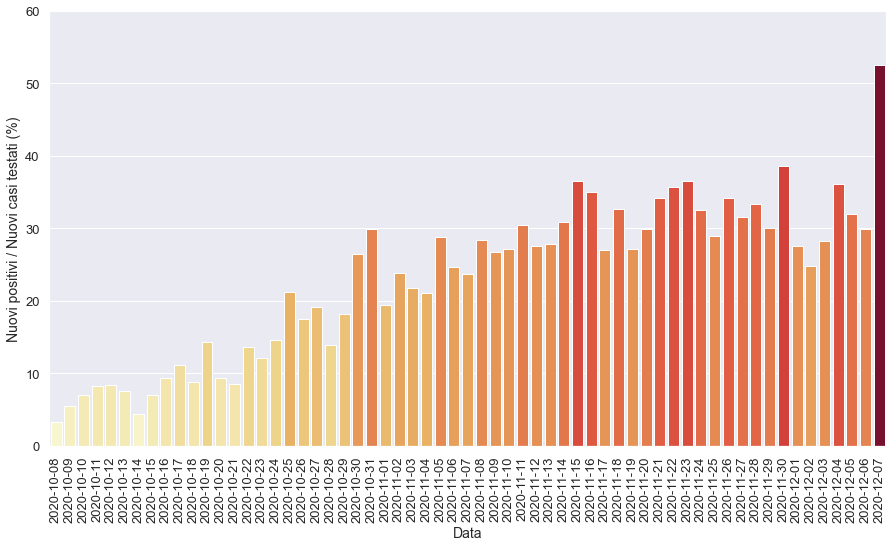

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

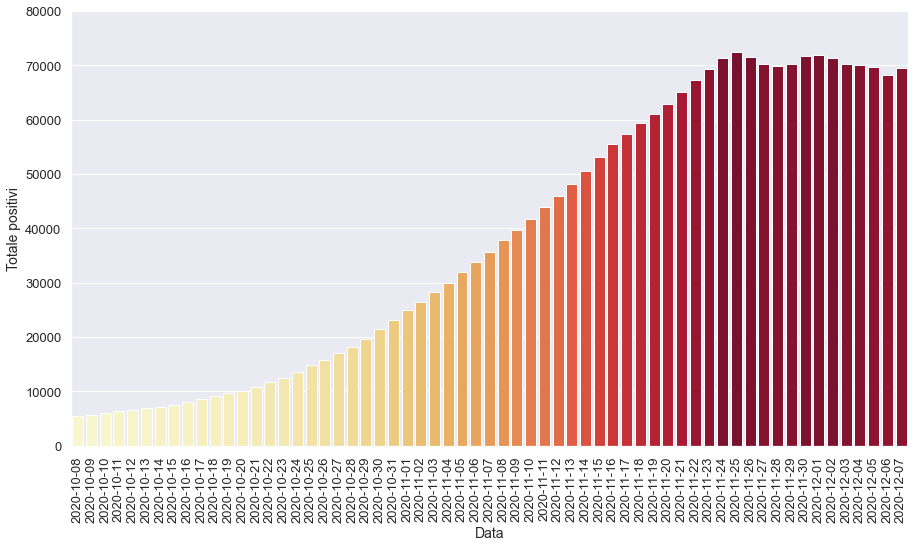

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

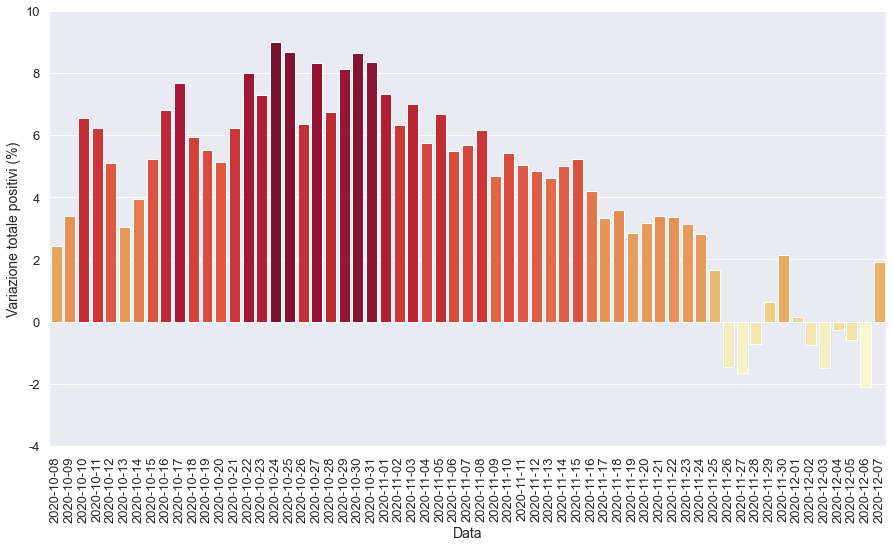

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

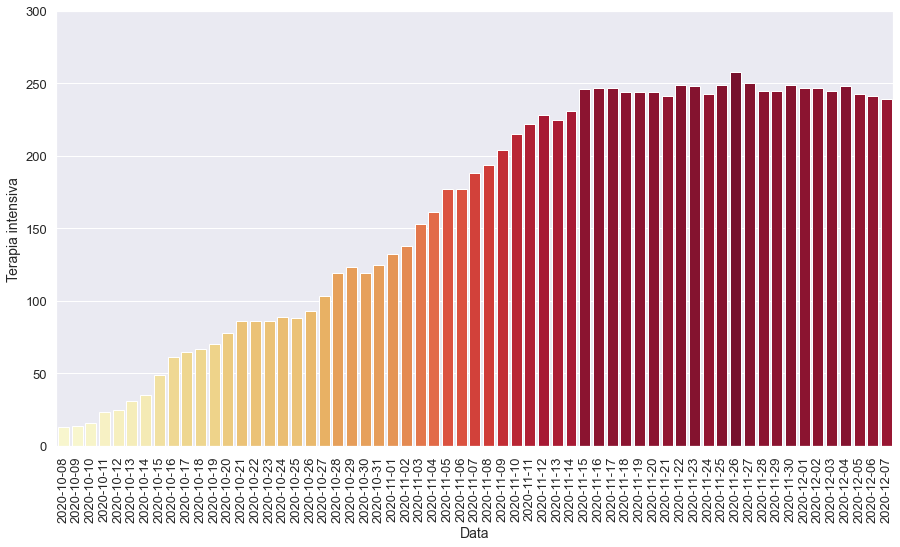

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

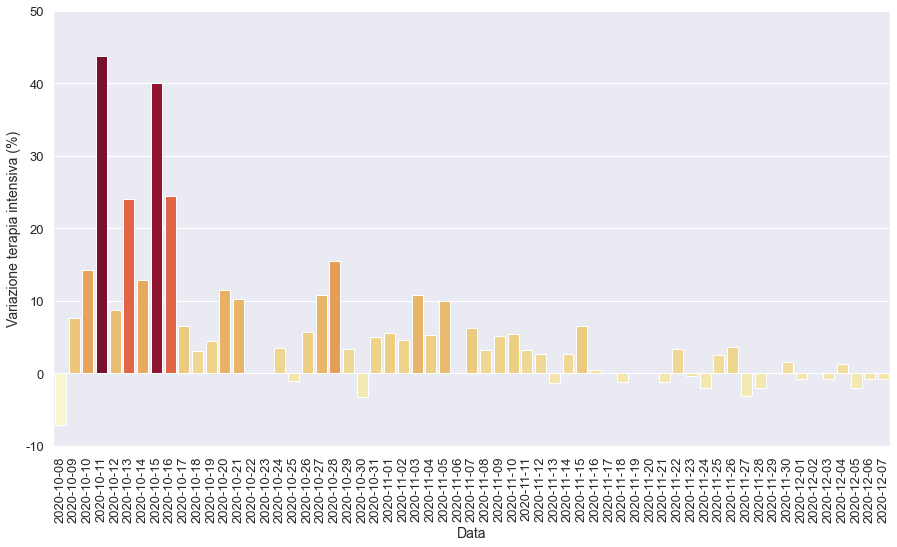

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

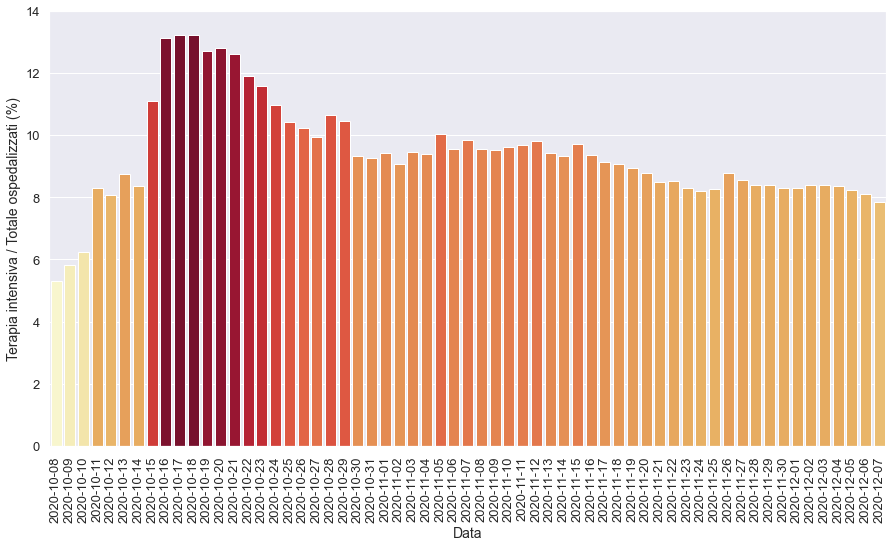

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

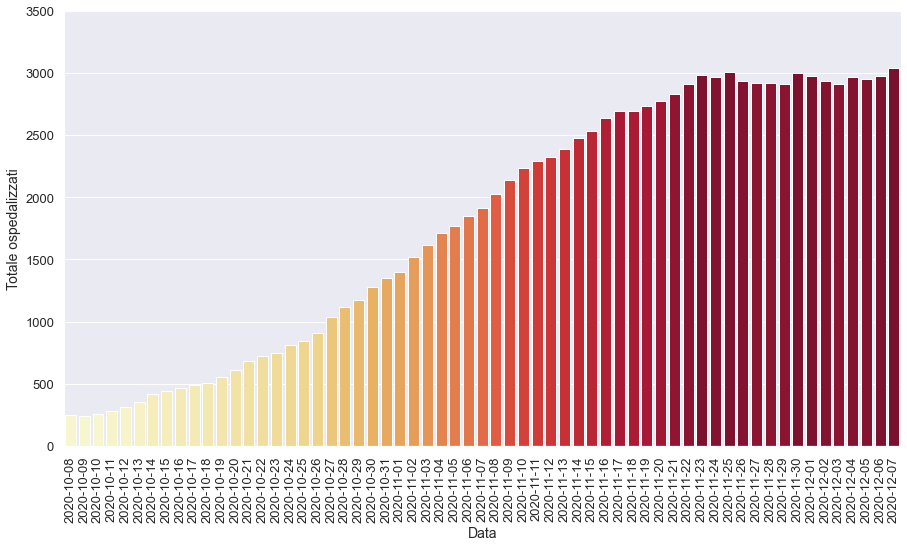

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

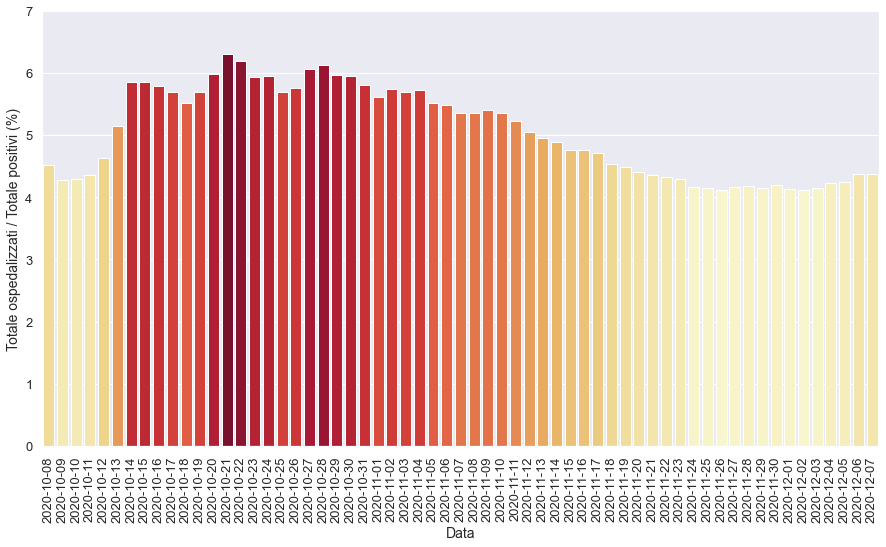

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

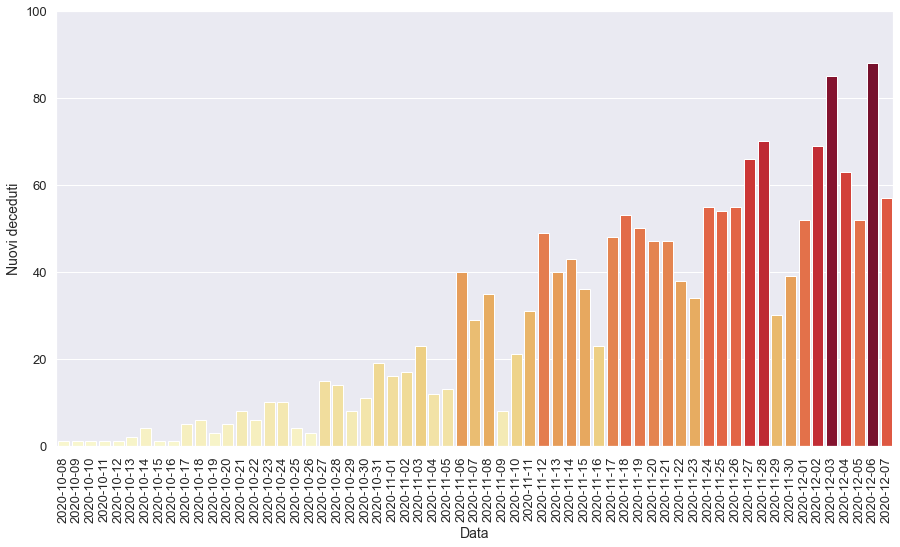

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

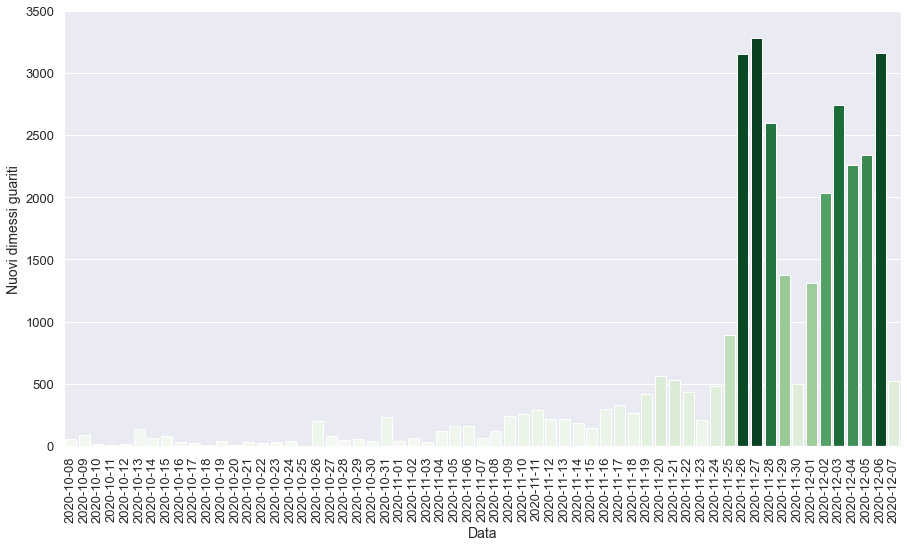

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-07T17:00:00,8,Emilia-Romagna,1723,188,1911,33738,35649,1919,2009,...,29.0,20218.0,8497.0,1858.0,9.84,5.36,9.94,23.64,6.21,5.69
1,2020-11-08T17:00:00,8,Emilia-Romagna,1836,194,2030,35822,37852,2203,2360,...,35.0,12950.0,8296.0,2084.0,9.56,5.36,18.22,28.45,3.19,6.18
2,2020-11-09T17:00:00,8,Emilia-Romagna,1939,204,2143,37487,39630,1778,2025,...,8.0,12471.0,7572.0,1665.0,9.52,5.41,16.24,26.74,5.15,4.70
3,2020-11-10T17:00:00,8,Emilia-Romagna,2020,215,2235,39545,41780,2150,2430,...,21.0,22539.0,8956.0,2058.0,9.62,5.35,10.78,27.13,5.39,5.43
4,2020-11-11T17:00:00,8,Emilia-Romagna,2072,222,2294,41597,43891,2111,2428,...,31.0,20674.0,7952.0,2052.0,9.68,5.23,11.74,30.53,3.26,5.05
5,2020-11-12T17:00:00,8,Emilia-Romagna,2094,228,2322,43702,46024,2133,2402,...,49.0,20310.0,8709.0,2105.0,9.82,5.05,11.83,27.58,2.70,4.86
6,2020-11-13T17:00:00,8,Emilia-Romagna,2164,225,2389,45767,48156,2132,2384,...,40.0,20512.0,8546.0,2065.0,9.42,4.96,11.62,27.90,-1.32,4.63
7,2020-11-14T17:00:00,8,Emilia-Romagna,2243,231,2474,48088,50562,2406,2637,...,43.0,21448.0,8534.0,2321.0,9.34,4.89,12.29,30.90,2.67,5.00
8,2020-11-15T17:00:00,8,Emilia-Romagna,2285,246,2531,50670,53201,2639,2822,...,36.0,12562.0,7719.0,2582.0,9.72,4.76,22.46,36.56,6.49,5.22
9,2020-11-16T17:00:00,8,Emilia-Romagna,2393,247,2640,52789,55429,2228,2547,...,23.0,14442.0,7287.0,2119.0,9.36,4.76,17.64,34.95,0.41,4.19


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

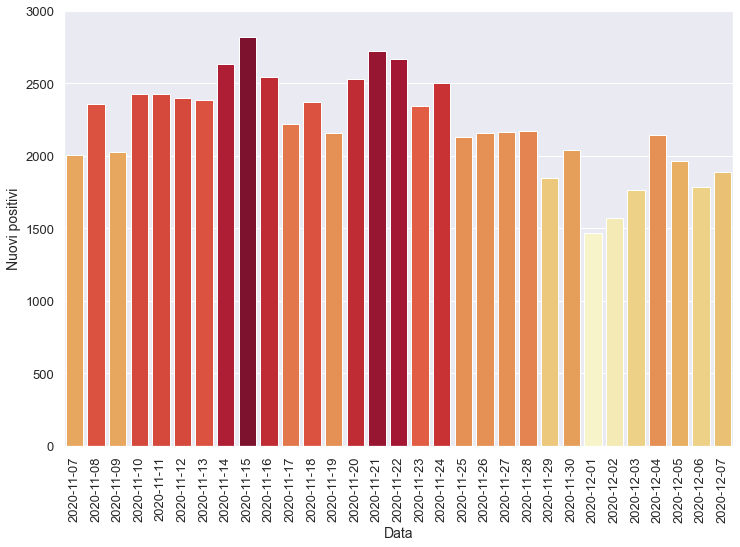

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

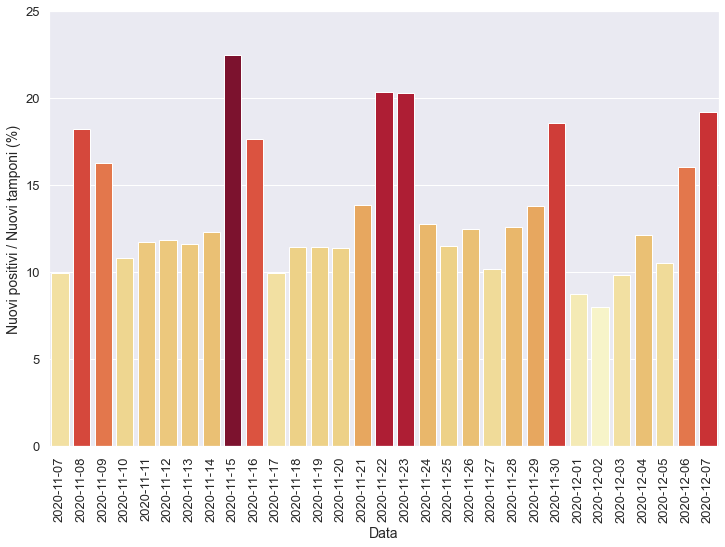

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

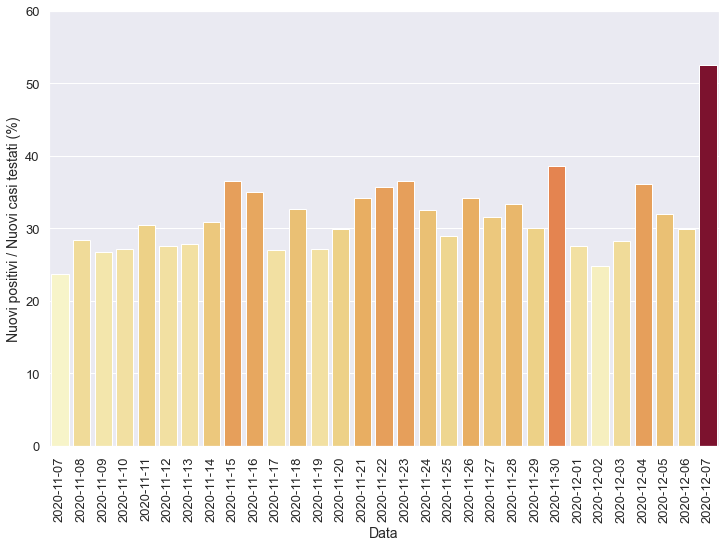

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

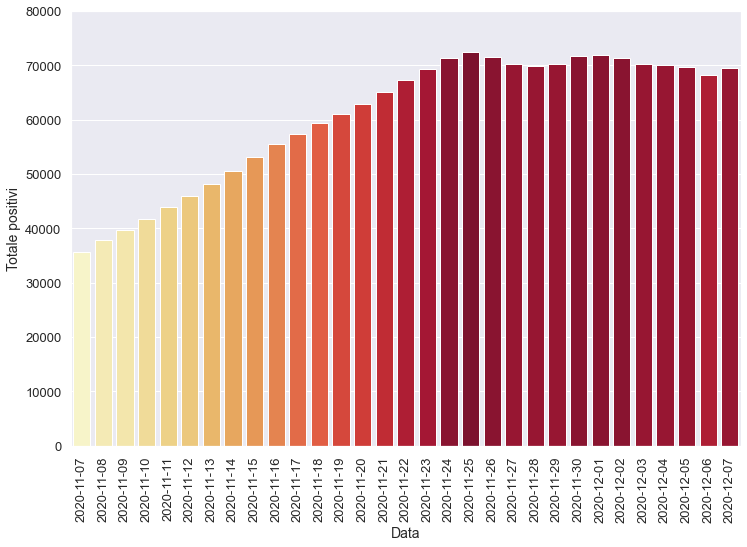

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

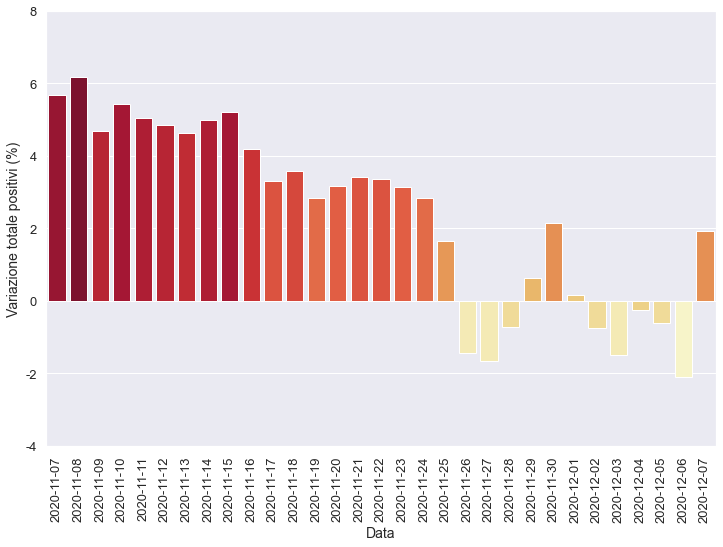

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

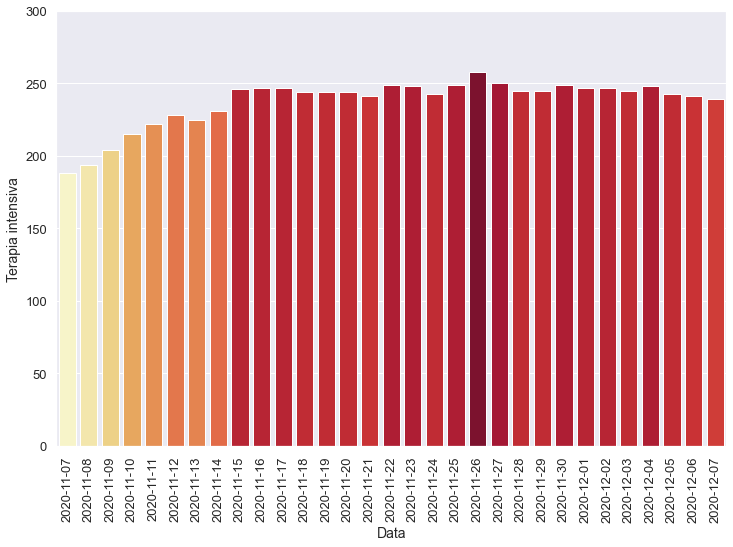

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

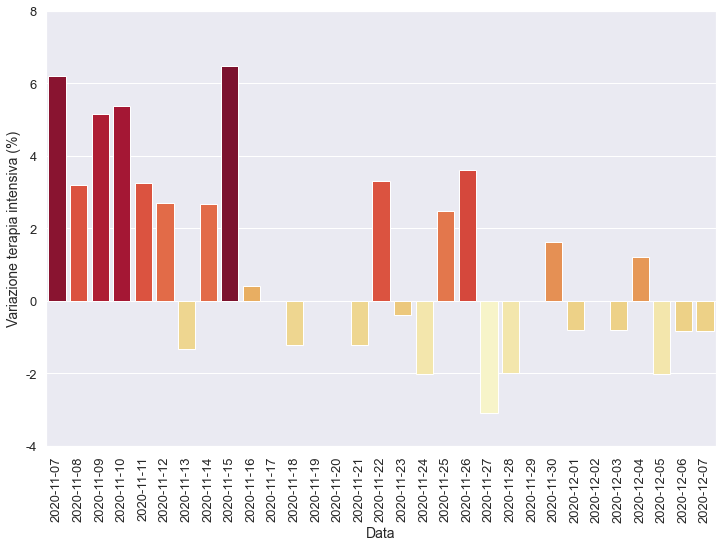

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

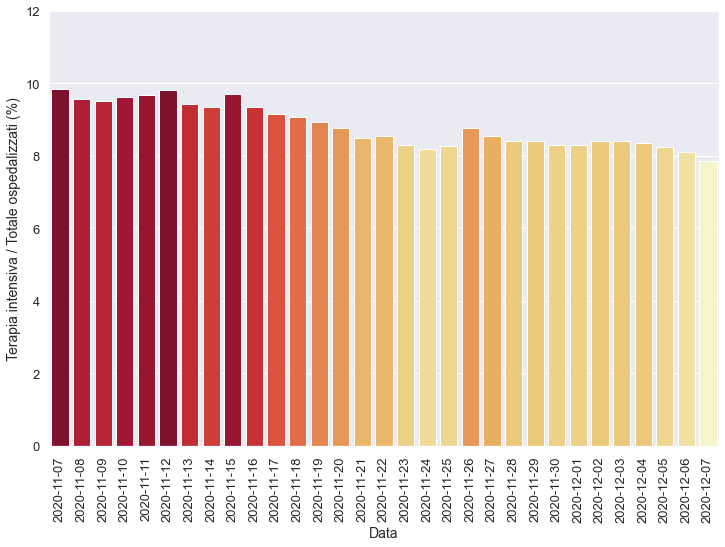

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

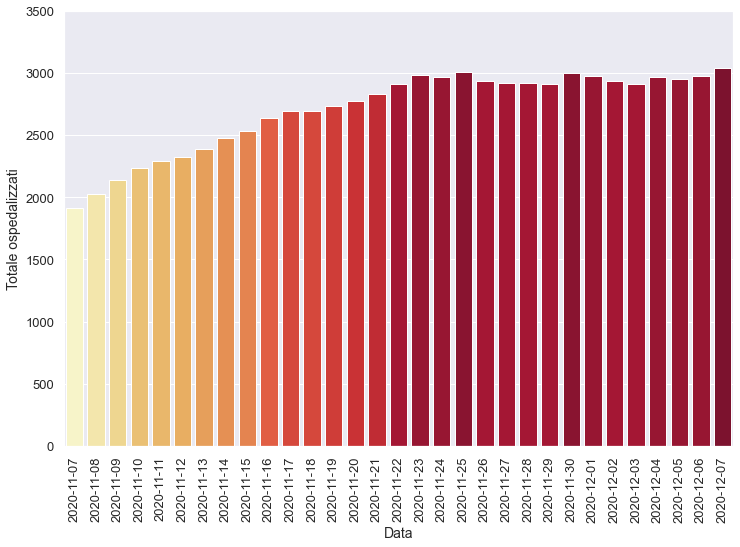

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

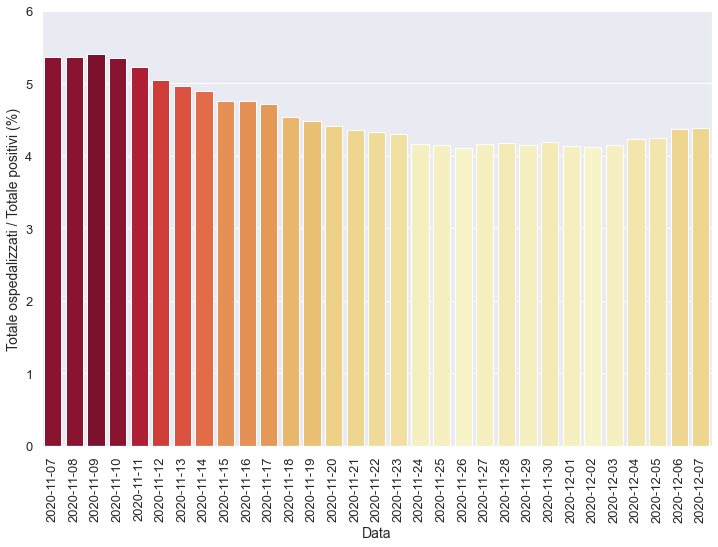

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

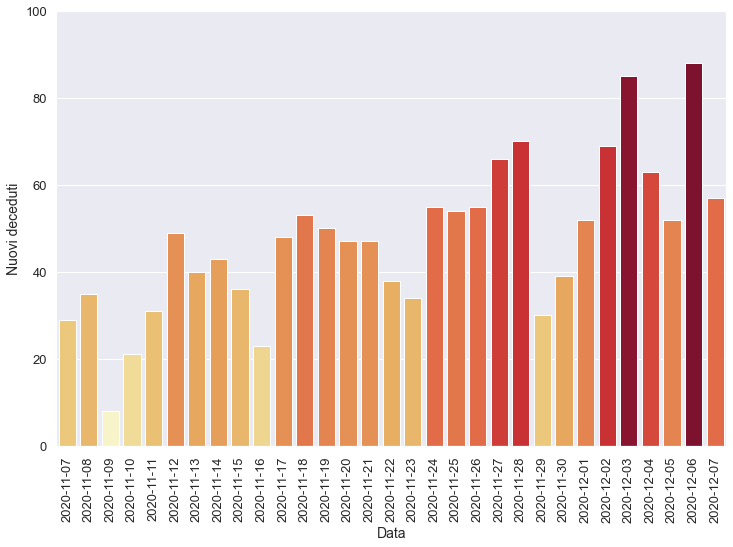

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

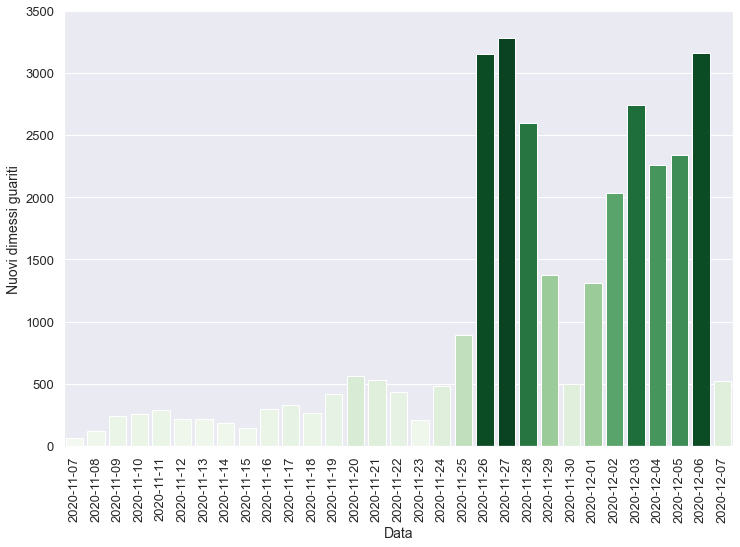

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-30T17:00:00,8,Emilia-Romagna,2755,249,3004,68730,71734,1505,2041,...,39.0,10992.0,5286.0,1414.0,8.29,4.19,18.57,38.61,1.63,2.14
1,2020-12-01T17:00:00,8,Emilia-Romagna,2729,247,2976,68866,71842,108,1471,...,52.0,16816.0,5346.0,136.0,8.30,4.14,8.75,27.52,-0.80,0.15
2,2020-12-02T17:00:00,8,Emilia-Romagna,2692,247,2939,68366,71305,-537,1569,...,69.0,19676.0,6319.0,-500.0,8.40,4.12,7.97,24.83,0.00,-0.75
3,2020-12-03T17:00:00,8,Emilia-Romagna,2668,245,2913,67324,70237,-1068,1766,...,85.0,17979.0,6242.0,-1042.0,8.41,4.15,9.82,28.29,-0.81,-1.50
4,2020-12-04T17:00:00,8,Emilia-Romagna,2717,248,2965,67091,70056,-181,2143,...,63.0,17677.0,5943.0,-233.0,8.36,4.23,12.12,36.06,1.22,-0.26
5,2020-12-05T17:00:00,8,Emilia-Romagna,2707,243,2950,66679,69629,-427,1964,...,52.0,18663.0,6140.0,-412.0,8.24,4.24,10.52,31.99,-2.02,-0.61
6,2020-12-06T17:00:00,8,Emilia-Romagna,2736,241,2977,65190,68167,-1462,1788,...,88.0,11171.0,5979.0,-1489.0,8.10,4.37,16.01,29.90,-0.82,-2.10
7,2020-12-07T17:00:00,8,Emilia-Romagna,2805,239,3044,66437,69481,1314,1891,...,57.0,9865.0,3600.0,1247.0,7.85,4.38,19.17,52.53,-0.83,1.93


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

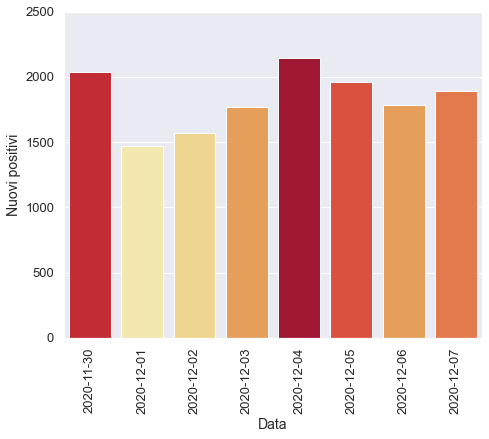

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

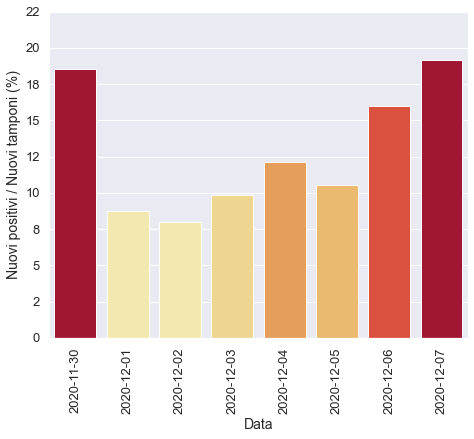

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

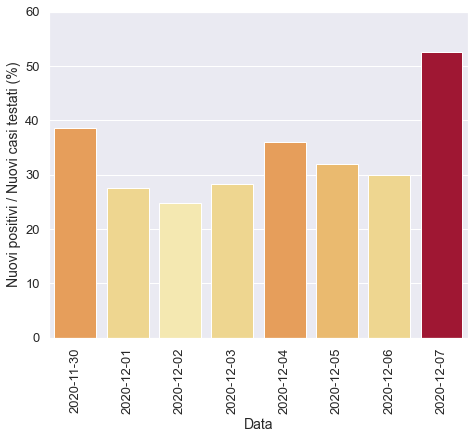

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

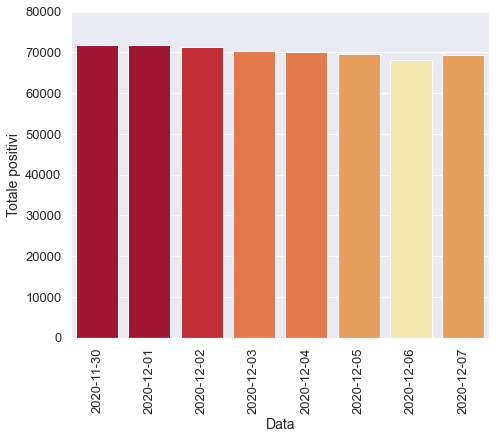

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

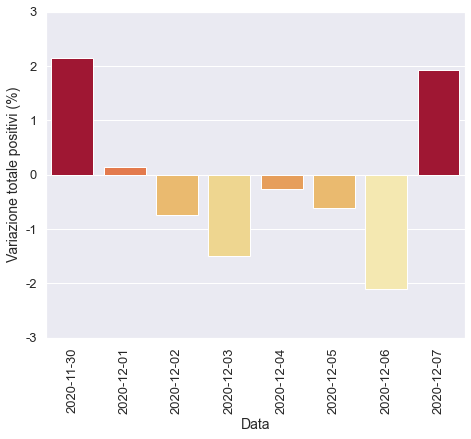

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

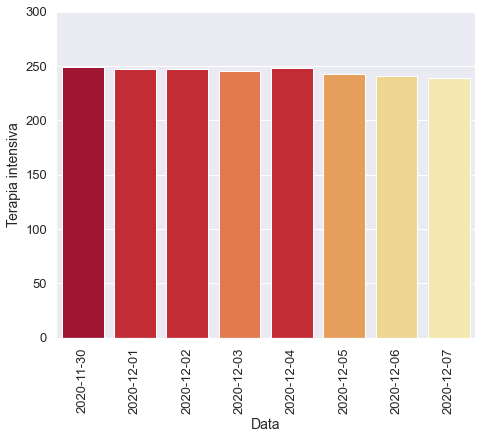

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

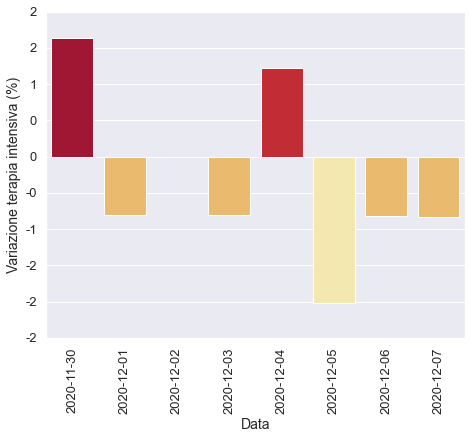

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

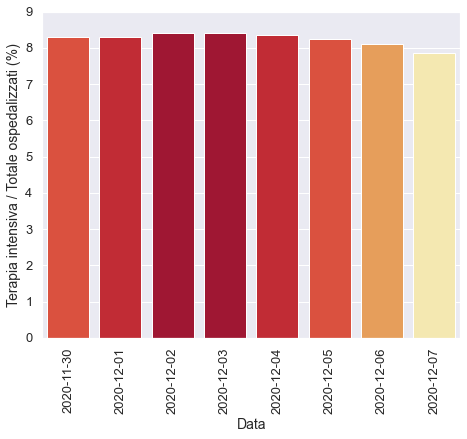

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

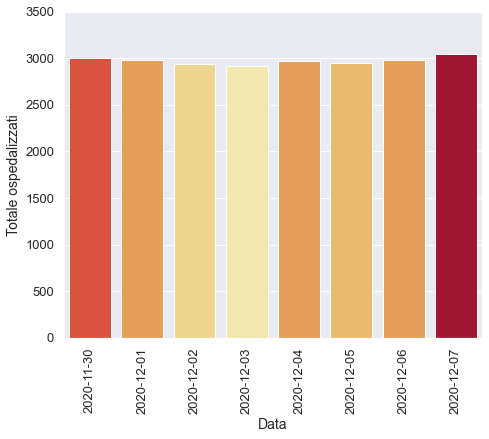

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

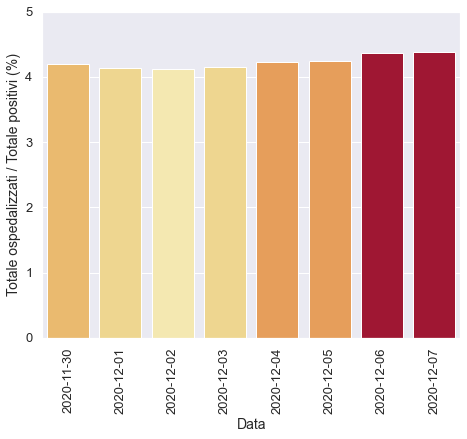

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

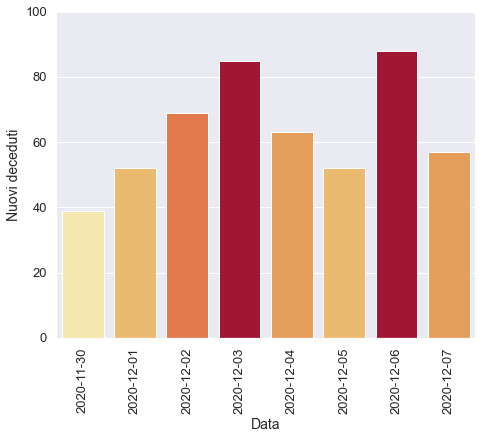

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

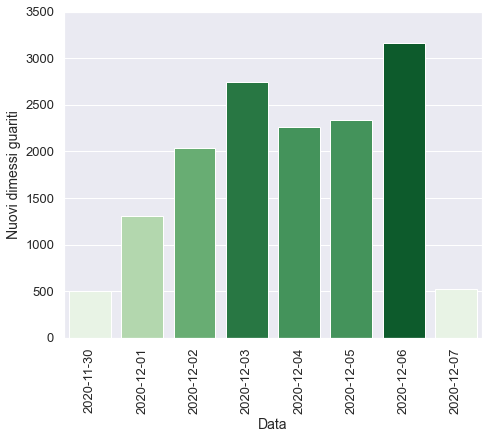

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)